In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('States/third_state')

In [3]:
df1.shape

(7329, 9)

In [4]:
df1.head()

,Unnamed: 0,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [5]:
df1.drop('Unnamed: 0', axis='columns', inplace=True)

In [6]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


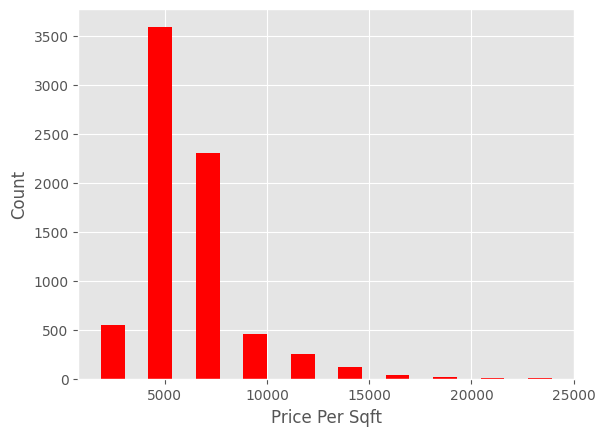

In [7]:
plt.hist(df1.price_per_sqft, rwidth=0.5, color='red')
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.show()

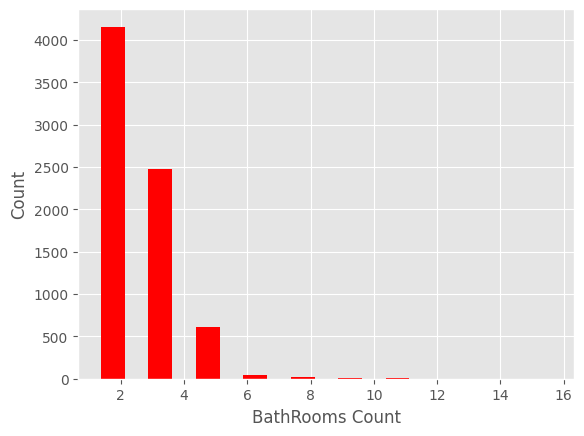

In [8]:
plt.hist(df1.bhk, rwidth=0.5, color='red')
plt.xlabel('BathRooms Count')
plt.ylabel('Count')
plt.show()

In [9]:
df1[df1.bhk+1<df1.bath].shape

(78, 8)

In [10]:
df2 = df1.drop(df1[df1.bhk+1<df1.bath].index)

In [11]:
df2.shape

(7251, 8)

In [12]:
df1.shape

(7329, 8)

In [13]:
df2.drop(['size', 'price_per_sqft'], axis='columns', inplace=True)

In [14]:
dummies = pd.get_dummies(df2.location)

In [15]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df3 = pd.concat([df2.drop('location', axis='columns'),
                 dummies.drop('other' ,axis='columns')], axis='columns') 

In [18]:
df3.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df4 = df3

In [35]:
df4.price = df3.price.apply(lambda x: round(x))
df4.total_sqft = df3.total_sqft.apply(lambda x: round(x))

In [36]:
df4

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,1.0,428,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630,3.0,2.0,194,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875,2.0,3.0,235,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200,2.0,0.0,130,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235,2.0,2.0,148,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7324,1200,2.0,3.0,70,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7325,1800,1.0,1.0,200,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7326,1353,2.0,2.0,110,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7327,812,1.0,0.0,26,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df4.isna().sum()

total_sqft            0
bath                  0
balcony               0
price                 0
bhk                   0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 246, dtype: int64

In [ ]:
df

In [38]:
df4.to_csv('States/final_state', index=False)

In [39]:
df = pd.read_csv('States/final_state')
df

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,1.0,428,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630,3.0,2.0,194,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875,2.0,3.0,235,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200,2.0,0.0,130,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235,2.0,2.0,148,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,1200,2.0,3.0,70,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7247,1800,1.0,1.0,200,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7248,1353,2.0,2.0,110,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7249,812,1.0,0.0,26,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
